In [92]:
import numpy as np 
import pandas as pd
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown
import plotly.graph_objs as go
import plotly.offline as py
from plotly.subplots import make_subplots
import plotly.express as px
import folium 
from folium import plugins
import scipy
from plotly.offline import init_notebook_mode, iplot 

In [78]:
def scatterPlotCasesOverTime(df, country):
    plot = make_subplots(rows=2, cols=2, subplot_titles=("Comfirmed", "Deaths", "Recovered", "Active"))
    subPlot1 = go.Scatter(x=df['Date'], y=df['Confirmed'], name="Confirmed", line_color='orange', opacity=0.8)
    subPlot2 = go.Scatter(x=df['Date'], y=df['Deaths'], name="Deaths", line_color='red', opacity=0.8)
    subPlot3 = go.Scatter(x=df['Date'], y=df['Recovered'], name="Recovered", line_color='green', opacity=0.8)
    subPlot4 = go.Scatter(x=df['Date'], y=df['Active'], name="Active", line_color='blue', opacity=0.8)
    plot.append_trace(subPlot1, 1, 1)
    plot.append_trace(subPlot2, 1, 2)
    plot.append_trace(subPlot3, 2, 1)
    plot.append_trace(subPlot4, 2, 2)
    plot.update_layout(template="ggplot2", title_text = country)
    plot.show()
    
def plotDailyReportedCasesOverTime(df, country):
    # confirmed
    fig = px.bar(df, x="Date", y="Confirmed")
    layout = go.Layout(title=go.layout.Title(text="Confirmed cases "+ country, x=0.5), font=dict(size=14),
        width=800, height=500, xaxis_title = "Date", yaxis_title = "Confirmed cases - " +country)
    fig.update_layout(layout)
    fig.show()

    # deaths
    fig = px.bar(df, x="Date", y="Deaths")
    layout = go.Layout(title=go.layout.Title(text="Reported deaths "+ country, x=0.5), font=dict(size=14),
        width=800, height=500, xaxis_title = "Date", yaxis_title = "Deaths Reported - " +country)
    fig.update_layout(layout)
    fig.show()

    # recovered
    fig = px.bar(df, x="Date", y="Recovered")
    layout = go.Layout(title=go.layout.Title(text="Recovered cases "+ country, x=0.5), font=dict(size=14),
        width=800, height=500, xaxis_title = "Date", yaxis_title = "Recovered Cases - " +country)
    fig.update_layout(layout)
    fig.show()
    
     # active
    fig = px.bar(df, x="Date", y="Active")
    layout = go.Layout(title=go.layout.Title(text="Active cases "+ country, x=0.5), font=dict(size=14),
        width=800, height=500, xaxis_title = "Date", yaxis_title = "Active Cases - " +country)
    fig.update_layout(layout)
    fig.show()

In [31]:
original_data = pd.read_csv('covid_19_data.csv')

In [32]:
original_data.columns

Index(['SNo', 'ObservationDate', 'Province/State', 'Country/Region',
       'Last Update', 'Confirmed', 'Deaths', 'Recovered'],
      dtype='object')

In [33]:
#rename columns
original_data.rename(columns={'Last Update': 'LastUpdate', 'Province/State': 'State', 'Country/Region': 'Country', 'ObservationDate': 'Date'}, inplace=True)

In [34]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 8 columns):
SNo           17049 non-null int64
Date          17049 non-null object
State         8496 non-null object
Country       17049 non-null object
LastUpdate    17049 non-null object
Confirmed     17049 non-null float64
Deaths        17049 non-null float64
Recovered     17049 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 1.0+ MB


In [35]:
#we dont require serial number column. so we'll remove it.
original_data.drop(['SNo'], axis=1, inplace=True)

In [36]:
original_data

,Date,State,Country,LastUpdate,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...
17044,04/20/2020,Wyoming,US,2020-04-20 23:44:50,317.0,2.0,0.0
17045,04/20/2020,Xinjiang,Mainland China,2020-04-20 23:44:50,76.0,3.0,73.0
17046,04/20/2020,Yukon,Canada,2020-04-20 23:44:50,11.0,0.0,0.0
17047,04/20/2020,Yunnan,Mainland China,2020-04-20 23:44:50,184.0,2.0,178.0


In [37]:
#convert observation date and last update column to datetime object
original_data['LastUpdate'] = original_data['LastUpdate'].apply(pd.to_datetime)
original_data['Date'] = original_data['Date'].apply(pd.to_datetime)

In [38]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 7 columns):
Date          17049 non-null datetime64[ns]
State         8496 non-null object
Country       17049 non-null object
LastUpdate    17049 non-null datetime64[ns]
Confirmed     17049 non-null float64
Deaths        17049 non-null float64
Recovered     17049 non-null float64
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 932.5+ KB


In [39]:
# Fill the missing values in 'State' with the 'Country' name.
original_data['State'] = original_data['State'].replace(np.nan, original_data['Country'])

In [40]:
original_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17049 entries, 0 to 17048
Data columns (total 7 columns):
Date          17049 non-null datetime64[ns]
State         17049 non-null object
Country       17049 non-null object
LastUpdate    17049 non-null datetime64[ns]
Confirmed     17049 non-null float64
Deaths        17049 non-null float64
Recovered     17049 non-null float64
dtypes: datetime64[ns](2), float64(3), object(2)
memory usage: 932.5+ KB


In [41]:
original_data.columns

Index(['Date', 'State', 'Country', 'LastUpdate', 'Confirmed', 'Deaths',
       'Recovered'],
      dtype='object')

In [42]:
# Active Case = confirmed - deaths - recovered
original_data['Active'] = original_data['Confirmed'] - original_data['Deaths'] - original_data['Recovered']

In [47]:
original_data['Day'] = original_data['LastUpdate'].apply(lambda x:x.day)
original_data['Hour'] = original_data['LastUpdate'].apply(lambda x:x.hour)

In [48]:
original_data.head()

,Date,State,Country,LastUpdate,Confirmed,Deaths,Recovered,Active,Day,Hour
0,2020-01-22,Anhui,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0,22,17
1,2020-01-22,Beijing,Mainland China,2020-01-22 17:00:00,14.0,0.0,0.0,14.0,22,17
2,2020-01-22,Chongqing,Mainland China,2020-01-22 17:00:00,6.0,0.0,0.0,6.0,22,17
3,2020-01-22,Fujian,Mainland China,2020-01-22 17:00:00,1.0,0.0,0.0,1.0,22,17
4,2020-01-22,Gansu,Mainland China,2020-01-22 17:00:00,0.0,0.0,0.0,0.0,22,17


In [50]:
print('start date: ',min(original_data['Date']),' End date: ',max(original_data['Date']))

start date:  2020-01-22 00:00:00  End date:  2020-04-20 00:00:00


In [54]:
#most recent data
strDate = original_data['Date'][-1:].astype('str')
year = int(strDate.values[0].split('-')[0])
month = int(strDate.values[0].split('-')[1])
day = int(strDate.values[0].split('-')[2].split()[0])
current_situation = original_data[original_data['LastUpdate'] > pd.Timestamp(date(year,month,day))]

In [56]:
print('Current situation in the world:')
print('Confirmed Cases : ',current_situation['Confirmed'].sum())
print('Deaths : ',current_situation['Deaths'].sum())
print('Recovered : ',current_situation['Recovered'].sum())
print('Total Active Cases around the globe : ',current_situation['Active'].sum())

Confirmed Cases around the globe :  2472259.0
Deaths Confirmed around the globe:  169986.0
Recovered Cases around the globe :  645738.0
Total Active Cases around the globe :  1656535.0


In [57]:
print("Total countries affected by SARS Covid-19: ",original_data['Country'].nunique())

Total countries affected by SARS Covid-19:  220


In [64]:
global_data_over_time = original_data.groupby('Date')['Confirmed','Deaths','Recovered','Active'].sum().reset_index()
scatterPlotCasesOverTime(global_data_over_time, "<b>Global</b>")

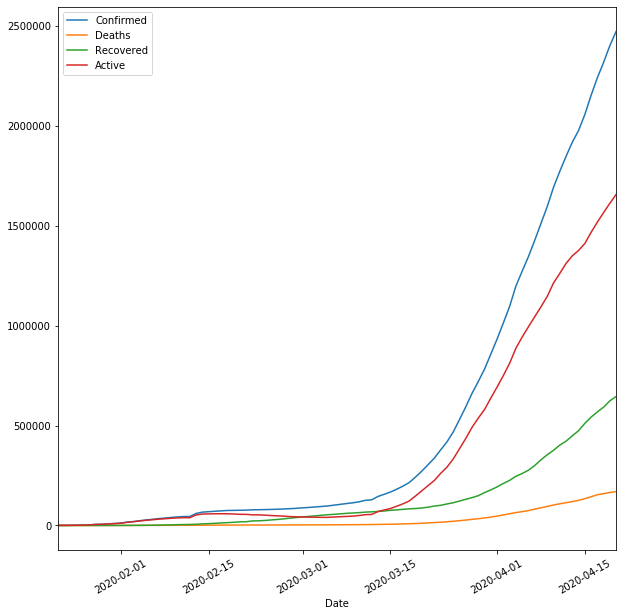

In [70]:
date_wise_data = original_data.groupby(["Date"]).sum().reset_index()
date_wise_data.Date = date_wise_data.Date.apply(lambda x:x.date())
date_wise_data.plot('Date',['Confirmed', 'Deaths', 'Recovered', 'Active'],figsize=(10,10), rot=30)

In [79]:
plotDailyReportedCasesOverTime(global_data_over_time, "all over World")

In [110]:
def logistic(x, L, k, x0):
    return L / (1 + np.exp(-k * (x - x0))) + 1

def plot_logistic_fit_data(d_df, title, p0=p0):
    d_df = d_df.sort_values(by=['Date'], ascending=True)
    d_df['x'] = np.arange(len(d_df)) + 1
    d_df['y'] = d_df['Confirmed']

    x = d_df['x']
    y = d_df['y']

    c2 = scipy.optimize.curve_fit(logistic,  x,  y,  p0=p0 )
    #y = logistic(x, L, k, x0)
    popt, pcov = c2

    x = range(1,d_df.shape[0] + int(popt[2]))
    y_fit = logistic(x, *popt)
    
    p_df = pd.DataFrame()
    p_df['x'] = x
    p_df['y'] = y_fit.astype(int)
    
    print("Predicted L (the maximum number of confirmed cases): " + str(int(popt[0])))
    print("Predicted k (growth rate): " + str(float(popt[1])))
    print("Predicted x0 (the day of the inflexion): " + str(int(popt[2])) + "")

    x0 = int(popt[2])
    
    traceC = go.Scatter(x=d_df['x'], y=d_df['y'], name="Confirmed", marker=dict(color="Red"), mode = "markers+lines",
        text=d_df['Confirmed'], )

    traceP = go.Scatter(x=p_df['x'], y=p_df['y'], name="Predicted", marker=dict(color="blue"), mode = "lines",
        text=p_df['y'], )
    
    trace_x0 = go.Scatter(x = [x0, x0], y = [0, p_df.loc[p_df['x']==x0,'y'].values[0]], name = "X0 - Inflexion point",
        marker=dict(color="black"), mode = "lines", text = "X0 - Inflexion point")
    data = [traceC, traceP, trace_x0]

    layout = dict(title = 'Cumulative Conformed cases and logistic curve projection',
          xaxis = dict(title = 'Day since first case', showticklabels=True), 
          yaxis = dict(title = 'Number of cases'),
          hovermode = 'closest',plot_bgcolor='rgb(275, 270, 273)'
         )
    fig = dict(data=data, layout=layout)
    iplot(fig, filename='covid-logistic-forecast')

In [111]:
d_df = date_wise_data.copy()
p0 = (0,0,0)

date_wise_data = original_data[original_data['Country']=='India'][['State',"Date","Confirmed","Deaths",'Active']]
date_wise_data = date_wise_data.groupby(["Date"]).sum().reset_index()

L = 250000
k = 0.25
x0 = 100
p0 = (L, k, x0)
plot_logistic_fit_data(d_df, 'India')

Predicted L (the maximum number of confirmed cases): 27864
Predicted k (growth rate): 0.1663762526358456
Predicted x0 (the day of the inflexion): 78
